In [1]:
a = "the quick brown fox jumps over the lazy dog"
b = "the lazy cat slept under the warm sunlight"
c = "the dog barked loudly as the mailman approached the gate"

In [2]:
def shingle(txt: str, k: int = 2):
    result = []
    for i in range(len(txt) - k+1):
        result.append(txt[i:i+k])
    return set(result)

In [3]:
k = 2
a = shingle(a, k)
b = shingle(b, k)
c = shingle(c, k)
print(a)

{' d', ' j', 'n ', 'wn', 'um', 'la', 'ju', 'og', ' f', 'ov', 'x ', 'r ', 'ro', 'ox', 'ps', ' o', 'br', 's ', 'do', 'az', 'ow', 'fo', 'zy', 'mp', 'k ', ' l', 'ck', 'qu', 'th', 'ic', 'he', ' q', 'er', 'ui', ' b', 'e ', 've', ' t', 'y '}


In [4]:
vocabulary = list(a.union(b).union(c))
print(vocabulary)

[' j', 'n ', 'd ', 'oa', 'at', 'sl', 'rm', 'um', 'le', 'de', 'ba', ' w', 'la', 'ke', 'as', ' f', 'pr', 'ov', 'x ', 'r ', ' c', ' u', 'ps', ' o', ' a', 's ', 'az', 'ow', 'ou', 'ly', 'ht', 'ai', 'zy', 'mp', 'lm', 'k ', 'ck', 'ic', 'nl', ' q', 'ui', 'li', 'ch', ' b', 'e ', 'ig', 'te', 'y ', ' d', 'pt', 'su', 'wn', 'ma', 'il', 'an', 'ju', 'og', 'nd', 'g ', 'ep', 'ro', 'ox', 'dl', ' s', 'ud', 'br', 'do', 'fo', 'gh', 'ac', ' l', 'ca', 'qu', 'th', 'rk', 'lo', 'he', 'wa', 'ap', 'ga', 'er', 'ar', 'un', 'm ', 't ', 've', ' t', ' g', 'pp', ' m', 'ed']


In [5]:
a_1hot = [1 if x in a else 0 for x in vocabulary]
b_1hot = [1 if x in b else 0 for x in vocabulary]
c_1hot = [1 if x in c else 0 for x in vocabulary]

In [6]:
print(a_1hot)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [7]:
from random import shuffle

hash_ex = list(range(1, len(vocabulary)+1))
shuffle(hash_ex)

In [8]:
def get_hash(length):
    hash_ex = list(range(1, length+1))
    shuffle(hash_ex)
    return hash_ex

def build_hash_functions(size, length):
    hash_functions = []
    for x in range(size):
        hash_functions.append(get_hash(length))
    return hash_functions

def create_signature(hot, functions):
    signature = []
    for func in functions:
        for x in range(1, len(func)+1):
            index = func.index(x)
            if hot[index] == 1:
                signature.append(index)
                break
    return signature

In [9]:
minhash_functions = build_hash_functions(20, len(vocabulary))

In [10]:
a_signature = create_signature(a_1hot, minhash_functions)

In [ ]:
from math import sqrt

def cosine_similarity(siga, sigb):
    dot_product = sum(x * y for x, y in zip(siga, sigb))
    norm_a = sqrt(sum(x * x for x in siga))
    norm_b = sqrt(sum(y * y for y in sigb))
    if norm_a == 0 or norm_b == 0:
        return 0.0
    return dot_product / (norm_a * norm_b)

def jaccard_similarity(siga, sigb):
    siga = set(siga)
    sigb = set(sigb)
    intersection = len(siga & sigb)
    union = len(siga | sigb)
    if union == 0:
        return 0.0
    return intersection / union

In [12]:
a_signature = create_signature(a_1hot, minhash_functions)
b_signature = create_signature(b_1hot, minhash_functions)

In [13]:
cosine_similarity(a_signature, b_signature)

0.8451351357239314

In [14]:
jaccard_similarity(a_signature, b_signature)

0.23076923076923078

In [15]:
def run_everything_till_now(values, num_functions):
    shingles = []
    for x in values:
        shingles.append(shingle(x, 4))
    vocabulary = list(set.union(*shingles))
    hots = []
    for i in shingles:
        hots.append([1 if x in i else 0 for x in vocabulary])
    functions = build_hash_functions(num_functions, len(vocabulary))
    signatures = []
    for x in hots:
        signatures.append(create_signature(x, functions))
    return signatures

In [16]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A fast brown fox leaps over a sleepy dog.",
    "The lazy cat slept under the warm sunlight.",
    "A sleepy feline napped in the afternoon sun.",
    "The dog barked loudly as the mailman approached the gate.",
    "A dog howled when the postman came near the fence.",
    "She read a book by the window all afternoon.",
    "He enjoyed reading novels beside the window.",
    "The rain fell softly on the green grass.",
    "Gentle rain watered the lush green lawn.",
    "The chef prepared a delicious meal for dinner.",
    "A tasty dinner was cooked by the chef.",
    "Children played soccer in the park until sunset.",
    "Kids played football at the park before dusk.",
    "The mountain was covered in a blanket of snow.",
    "Snow blanketed the mountain during winter.",
    "The artist painted a beautiful landscape.",
    "A stunning landscape was created by the painter.",
    "The computer crashed while saving the document.",
    "The laptop froze during the file save process."
]

In [17]:
signatures = run_everything_till_now(sentences, 2000)

In [18]:
first = signatures[-1]
second = signatures[-3]
print(cosine_similarity(first, second), jaccard_similarity(first, second))

0.7356286800980874 0.03529411764705882


In [19]:
def split_vector(signature, b):
    assert len(signature)%b == 0, "Bro atleast divide properly :_)"
    r = int(len(signature)/b)
    subvecs = []
    for x in range(0, len(signature), r):
        subvecs.append(signature[x:x+r])
    return subvecs

In [34]:
def build_split_vectors(values, num_functions):
    signatures = run_everything_till_now(values, num_functions)
    split_vectors = []
    for x in signatures:
        split_vectors.append(split_vector(x, 2000))
    return split_vectors

In [35]:
split_vectors = build_split_vectors(sentences, 10000)

In [36]:
similar_sentence_idx = []
for x in range(len(sentences)):
    for y in range(x+1, len(sentences)):
        vec1 = split_vectors[x]
        vec2 = split_vectors[y]
        for row1, row2 in zip(vec1, vec2):
            if row1 == row2:
                print(f"Sentence {x} similar to sentence {y}")
                similar_sentence_idx.append((x,y))
                break

Sentence 0 similar to sentence 1
Sentence 14 similar to sentence 15


In [37]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A fast brown fox leaps over a sleepy dog.",
    "The lazy cat slept under the warm sunlight.",
    "A sleepy feline napped in the afternoon sun.",
    "The dog barked loudly as the mailman approached the gate.",
    "A dog howled when the postman came near the fence.",
    "She read a book by the window all afternoon.",
    "He enjoyed reading novels beside the window.",
    "The rain fell softly on the green grass.",
    "Gentle rain watered the lush green lawn.",
    "The chef prepared a delicious meal for dinner.",
    "A tasty dinner was cooked by the chef.",
    "Children played soccer in the park until sunset.",
    "Kids played football at the park before dusk.",
    "The mountain was covered in a blanket of snow.",
    "Snow blanketed the mountain during winter.",
    "The artist painted a beautiful landscape.",
    "A stunning landscape was created by the painter.",
    "The computer crashed while saving the document.",
    "The laptop froze during the file save process."
]

In [38]:
print(similar_sentence_idx)

[(0, 1), (14, 15)]


In [39]:
def logistic_map(x0, N):
    x = [x0]
    for _ in range(N - 1):
        x.append(4 * x[-1] * (1 - x[-1]))
    return x


In [69]:
out = logistic_map(0.6, 200)

In [70]:
import matplotlib.pyplot as plt

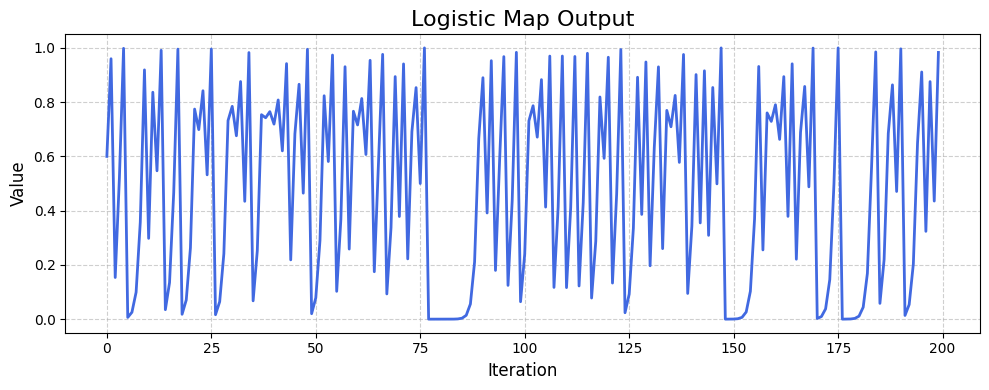

In [71]:
plt.figure(figsize=(10, 4))
plt.plot(out, color='royalblue', linewidth=2)
plt.title('Logistic Map Output', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()